In [83]:
#Import your dependencies and read in the `charity_data.csv` to a Pandas DataFrame.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import keras_tuner as kt

import pandas as pd 
application_df = pd.read_csv("../Resources/charity_data.csv")
application_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [84]:
application_df['SPECIAL_CONSIDERATIONS'].value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [85]:
#Preprocess the dataset like you did in Step 1, Be sure to adjust for any modifications that came out of optimizing the model.

application_df = application_df.drop(["EIN", "NAME", "SPECIAL_CONSIDERATIONS"], axis = 1)
application_df.head(10)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,142590,1
5,T3,Independent,C1200,Preservation,Trust,1,0,5000,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0


In [86]:
application_types_to_replace = ["T9","T13","T12","T2","T14","T25","T15","T29","T17","T10"]

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [87]:
value_count = application_df["CLASSIFICATION"].value_counts()
value_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2600        1
C2150        1
C2380        1
C2190        1
C1732        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [88]:
small_to_replace = value_count[value_count < 115].index

# Replace in dataframe
for cls in small_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

application_df["CLASSIFICATION"].value_counts()


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other      887
C7000      777
C1700      287
C4000      194
C5000      116
Name: CLASSIFICATION, dtype: int64

In [89]:
ask_amt = application_df['ASK_AMT']

for amt in ask_amt:
    amt = int(amt)

ask_amt.max()

8597806340

In [90]:
bins = [0,10000,25000,100000,500000,1000000,5000000,10000000,50000000,9000000000]

bin_labels = ["<10000","10k-25k","25k-100k","100k-500k","500k-1m","1m-5m","5m-10m","10m-50m","50m+",]

application_df['ASK_AMT_CAT'] = pd.cut(ask_amt, bins, labels=bin_labels)

application_df.head(20)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL,ASK_AMT_CAT
0,Other,Independent,C1000,ProductDev,Association,1,0,5000,1,<10000
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,108590,1,100k-500k
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0,<10000
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,6692,1,<10000
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,142590,1,100k-500k
5,T3,Independent,C1200,Preservation,Trust,1,0,5000,1,<10000
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,31452,1,25k-100k
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,7508025,1,5m-10m
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,94389,1,25k-100k
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0,<10000


In [91]:
affiliation_types_to_replace = ["Family/Parent","National","Regional"]

# Replace in dataframe
for app in affiliation_types_to_replace:
    application_df['AFFILIATION'] = application_df['AFFILIATION'].replace(app,"Other")

# Check to make sure binning was successful
application_df['AFFILIATION'].value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [92]:
organisation_types_to_replace = ["Co-operative","Corporation"]

# Replace in dataframe
for app in affiliation_types_to_replace:
    application_df['ORGANIZATION'] = application_df['ORGANIZATION'].replace(app,"Other")

# Check to make sure binning was successful
application_df['ORGANIZATION'].value_counts()

Trust          23515
Association    10255
Other            529
Name: ORGANIZATION, dtype: int64

In [93]:
categorized = pd.get_dummies(application_df, columns = ['APPLICATION_TYPE','CLASSIFICATION','AFFILIATION', 'USE_CASE', 'ORGANIZATION','INCOME_AMT','ASK_AMT_CAT'])
categorized

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_5M-10M,ASK_AMT_CAT_<10000,ASK_AMT_CAT_10k-25k,ASK_AMT_CAT_25k-100k,ASK_AMT_CAT_100k-500k,ASK_AMT_CAT_500k-1m,ASK_AMT_CAT_1m-5m,ASK_AMT_CAT_5m-10m,ASK_AMT_CAT_10m-50m,ASK_AMT_CAT_50m+
0,1,5000,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,108590,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,5000,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,6692,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,142590,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34295,1,5000,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34296,1,5000,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34297,1,5000,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


Original Model Accuracy = 0.7267

Model Revision 1 - Dataset change to features

In [123]:
#Design a neural network model, and be sure to adjust for modifications that will optimize the model to achieve higher than 75% accuracy.

# Split our preprocessed data into our features and target arrays
X=categorized.drop(['IS_SUCCESSFUL'], axis = 1).values
y= categorized['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [124]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [125]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn1 = tf.keras.models.Sequential()

input_features = len(X_train_scaled[0])

# Add our first Dense layer, including the input layer
nn1.add(tf.keras.layers.Dense(units=4, activation="relu", input_dim=input_features))

nn1.add(tf.keras.layers.Dense(units=4, activation='relu'))

# Add the output layer that uses a probability activation function
nn1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the Sequential model
nn1.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 4)                 200       
                                                                 
 dense_44 (Dense)            (None, 4)                 20        
                                                                 
 dense_45 (Dense)            (None, 1)                 5         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [126]:
print(input_features)

49


In [127]:
# Compile the model
nn1.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

In [128]:
fit_nn1 = nn1.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6546 - accuracy: 0.6109
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6037 - accuracy: 0.7056
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5876 - accuracy: 0.7097
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5820 - accuracy: 0.7119
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5750 - accuracy: 0.7207
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5709 - accuracy: 0.7235
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5691 - accuracy: 0.7228
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5677 - accuracy: 0.7226
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5657 - accuracy: 0.7236
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5651 - accura

In [129]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5641 - accuracy: 0.7249 - 424ms/epoch - 2ms/step
Loss: 0.5640548467636108, Accuracy: 0.7248979806900024


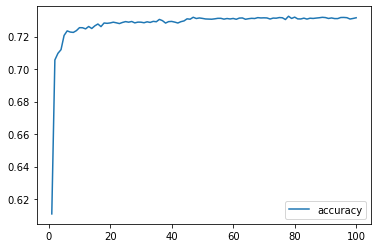

In [130]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_nn1.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="accuracy")

Revised model accuracy is 0.7248, original at 0.7267

Model Revision 2 - Add Layer and increase Epochs

In [131]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn2 = tf.keras.models.Sequential()

input_features = len(X_train_scaled[0])

# Add our first Dense layer, including the input layer
nn2.add(tf.keras.layers.Dense(units=4, activation="relu", input_dim=input_features))

nn2.add(tf.keras.layers.Dense(units=4, activation='relu'))

nn2.add(tf.keras.layers.Dense(units=4, activation='relu'))

# Add the output layer that uses a probability activation function
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the Sequential model
nn2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 4)                 200       
                                                                 
 dense_47 (Dense)            (None, 4)                 20        
                                                                 
 dense_48 (Dense)            (None, 4)                 20        
                                                                 
 dense_49 (Dense)            (None, 1)                 5         
                                                                 
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


In [132]:
# Compile the model
nn2.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

In [133]:
fit_nn2 = nn2.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
804/804 [==============================] - 2s 2ms/step - loss: 0.6335 - accuracy: 0.6620
Epoch 2/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5761 - accuracy: 0.7250
Epoch 3/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5675 - accuracy: 0.7279
Epoch 4/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5644 - accuracy: 0.7279
Epoch 5/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5625 - accuracy: 0.7293
Epoch 6/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5596 - accuracy: 0.7295
Epoch 7/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5552 - accuracy: 0.7292
Epoch 8/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5531 - accuracy: 0.7301
Epoch 9/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5519 - accuracy: 0.7293
Epoch 10/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5513 - accura

In [134]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5507 - accuracy: 0.7311 - 296ms/epoch - 1ms/step
Loss: 0.5506758093833923, Accuracy: 0.7310787439346313


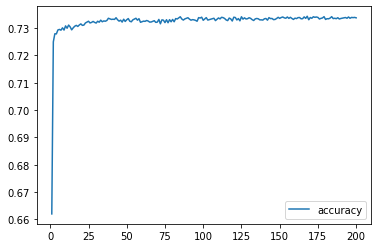

In [135]:
# Create a DataFrame containing training history
history_df2 = pd.DataFrame(fit_nn2.history)

# Increase the index by 1 to match the number of epochs
history_df2.index += 1

# Plot the loss
history_df2.plot(y="accuracy")

Model revision 2 accuract = 0.7310

Model Revision 3 - change to compile step

In [137]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn3 = tf.keras.models.Sequential()

input_features = len(X_train_scaled[0])

# Add our first Dense layer, including the input layer
nn3.add(tf.keras.layers.Dense(units=4, activation="relu", input_dim=input_features))

nn3.add(tf.keras.layers.Dense(units=4, activation='relu'))

nn3.add(tf.keras.layers.Dense(units=4, activation='relu'))

# Add the output layer that uses a probability activation function
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the Sequential model
nn3.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 4)                 200       
                                                                 
 dense_55 (Dense)            (None, 4)                 20        
                                                                 
 dense_56 (Dense)            (None, 4)                 20        
                                                                 
 dense_57 (Dense)            (None, 1)                 5         
                                                                 
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


In [138]:
# Compile the model
nn3.compile(loss="binary_crossentropy", optimizer='Nadam', metrics=["accuracy"], steps_per_execution = 10)

In [139]:
fit_nn3 = nn3.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
804/804 [==============================] - 2s 2ms/step - loss: 0.6460 - accuracy: 0.6297
Epoch 2/200
804/804 [==============================] - 0s 528us/step - loss: 0.5692 - accuracy: 0.7217
Epoch 3/200
804/804 [==============================] - 0s 523us/step - loss: 0.5603 - accuracy: 0.7247
Epoch 4/200
804/804 [==============================] - 0s 459us/step - loss: 0.5566 - accuracy: 0.7266
Epoch 5/200
804/804 [==============================] - 0s 476us/step - loss: 0.5545 - accuracy: 0.7268
Epoch 6/200
804/804 [==============================] - 0s 474us/step - loss: 0.5534 - accuracy: 0.7287
Epoch 7/200
804/804 [==============================] - 0s 392us/step - loss: 0.5528 - accuracy: 0.7289
Epoch 8/200
804/804 [==============================] - 0s 432us/step - loss: 0.5523 - accuracy: 0.7292
Epoch 9/200
804/804 [==============================] - 0s 399us/step - loss: 0.5516 - accuracy: 0.7291
Epoch 10/200
804/804 [==============================] - 0s 458us/step - los

In [140]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5514 - accuracy: 0.7268 - 247ms/epoch - 923us/step
Loss: 0.5513572096824646, Accuracy: 0.7267638444900513


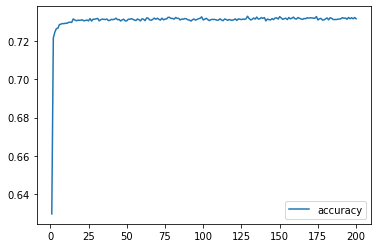

In [141]:
# Create a DataFrame containing training history
history_df3 = pd.DataFrame(fit_nn3.history)

# Increase the index by 1 to match the number of epochs
history_df3.index += 1

# Plot the loss
history_df3.plot(y="accuracy")

model revision 3 accuracy = 0.7267

Model Revision 4 increase nodes in layers

In [142]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn4 = tf.keras.models.Sequential()

input_features = len(X_train_scaled[0])

# Add our first Dense layer, including the input layer
nn4.add(tf.keras.layers.Dense(units=8, activation="relu", input_dim=input_features))

nn4.add(tf.keras.layers.Dense(units=8, activation='relu'))

nn4.add(tf.keras.layers.Dense(units=8, activation='relu'))

# Add the output layer that uses a probability activation function
nn4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the Sequential model
nn4.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 8)                 400       
                                                                 
 dense_59 (Dense)            (None, 8)                 72        
                                                                 
 dense_60 (Dense)            (None, 8)                 72        
                                                                 
 dense_61 (Dense)            (None, 1)                 9         
                                                                 
Total params: 553
Trainable params: 553
Non-trainable params: 0
_________________________________________________________________


In [143]:
# Compile the model
nn4.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"], steps_per_execution = 10)

In [144]:
fit_nn4 = nn4.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
804/804 [==============================] - 1s 1ms/step - loss: 0.6215 - accuracy: 0.6784
Epoch 2/200
804/804 [==============================] - 0s 431us/step - loss: 0.5705 - accuracy: 0.7193
Epoch 3/200
804/804 [==============================] - 0s 360us/step - loss: 0.5605 - accuracy: 0.7253
Epoch 4/200
804/804 [==============================] - 0s 367us/step - loss: 0.5568 - accuracy: 0.7281
Epoch 5/200
804/804 [==============================] - 0s 361us/step - loss: 0.5538 - accuracy: 0.7280
Epoch 6/200
804/804 [==============================] - 0s 365us/step - loss: 0.5526 - accuracy: 0.7302
Epoch 7/200
804/804 [==============================] - 0s 355us/step - loss: 0.5510 - accuracy: 0.7296
Epoch 8/200
804/804 [==============================] - 0s 367us/step - loss: 0.5500 - accuracy: 0.7304
Epoch 9/200
804/804 [==============================] - 0s 355us/step - loss: 0.5487 - accuracy: 0.7311
Epoch 10/200
804/804 [==============================] - 0s 363us/step - los

In [145]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5597 - accuracy: 0.7278 - 250ms/epoch - 931us/step
Loss: 0.5596529245376587, Accuracy: 0.7278134226799011


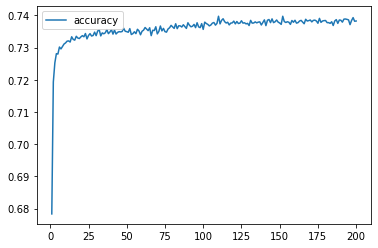

In [146]:
# Create a DataFrame containing training history
history_df4 = pd.DataFrame(fit_nn4.history)

# Increase the index by 1 to match the number of epochs
history_df4.index += 1

# Plot the loss
history_df4.plot(y="accuracy")

Model Revision 5

In [152]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn5 = tf.keras.models.Sequential()

input_features = len(X_train_scaled[0])

# Add our first Dense layer, including the input layer
nn5.add(tf.keras.layers.Dense(units=4, activation="sigmoid", input_dim=input_features))

nn5.add(tf.keras.layers.Dense(units=4, activation='sigmoid'))

# Add the output layer that uses a probability activation function
nn5.add(tf.keras.layers.Dense(units=1, activation="relu"))


# Check the structure of the Sequential model
nn5.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 4)                 200       
                                                                 
 dense_69 (Dense)            (None, 4)                 20        
                                                                 
 dense_70 (Dense)            (None, 1)                 5         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [153]:
# Compile the model
nn5.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

In [154]:
fit_nn5 = nn5.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
804/804 [==============================] - 1s 1ms/step - loss: 0.7415 - accuracy: 0.5798
Epoch 2/200
804/804 [==============================] - 1s 968us/step - loss: 0.6054 - accuracy: 0.7178
Epoch 3/200
804/804 [==============================] - 1s 989us/step - loss: 0.5792 - accuracy: 0.7222
Epoch 4/200
804/804 [==============================] - 1s 982us/step - loss: 0.5715 - accuracy: 0.7243
Epoch 5/200
804/804 [==============================] - 1s 983us/step - loss: 0.5670 - accuracy: 0.7243
Epoch 6/200
804/804 [==============================] - 1s 979us/step - loss: 0.5633 - accuracy: 0.7268
Epoch 7/200
804/804 [==============================] - 1s 970us/step - loss: 0.5601 - accuracy: 0.7277
Epoch 8/200
804/804 [==============================] - 1s 989us/step - loss: 0.5576 - accuracy: 0.7283
Epoch 9/200
804/804 [==============================] - 1s 971us/step - loss: 0.5558 - accuracy: 0.7278
Epoch 10/200
804/804 [==============================] - 1s 1ms/step - loss:

In [155]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn5.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5552 - accuracy: 0.7292 - 291ms/epoch - 1ms/step
Loss: 0.5552169680595398, Accuracy: 0.7292128205299377


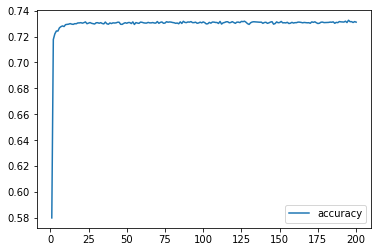

In [156]:
# Create a DataFrame containing training history
history_df5 = pd.DataFrame(fit_nn5.history)

# Increase the index by 1 to match the number of epochs
history_df5.index += 1

# Plot the loss
history_df5.plot(y="accuracy")

In [157]:
#Save and export your results to an HDF5 file. Name the file `AlphabetSoupCharity_Optimization.h5`.

model_json = nn2.to_json()
with open("AlphabetSoupCharity_Optimization", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
nn2.save_weights("AlphabetSoupCharity_Optimization.h5")

In [203]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn6 = tf.keras.models.Sequential()

input_features = len(X_train_scaled[0])

# Add our first Dense layer, including the input layer
nn6.add(tf.keras.layers.Dense(units=49, activation="relu", input_dim=input_features))

nn6.add(tf.keras.layers.Dense(units=8, activation='relu'))

nn6.add(tf.keras.layers.Dense(units=8, activation='relu'))

# Add the output layer that uses a probability activation function
nn6.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the Sequential model
nn6.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_107 (Dense)           (None, 49)                2450      
                                                                 
 dense_108 (Dense)           (None, 8)                 400       
                                                                 
 dense_109 (Dense)           (None, 8)                 72        
                                                                 
 dense_110 (Dense)           (None, 1)                 9         
                                                                 
Total params: 2,931
Trainable params: 2,931
Non-trainable params: 0
_________________________________________________________________


In [204]:
# Compile the model
nn6.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"], steps_per_execution= 50)

In [205]:
fit_nn6 = nn6.fit(X_train_scaled, y_train, epochs=250)

Epoch 1/250
804/804 [==============================] - 1s 1ms/step - loss: 0.5808 - accuracy: 0.7132
Epoch 2/250
804/804 [==============================] - 0s 314us/step - loss: 0.5522 - accuracy: 0.7301
Epoch 3/250
804/804 [==============================] - 0s 295us/step - loss: 0.5485 - accuracy: 0.7323
Epoch 4/250
804/804 [==============================] - 0s 294us/step - loss: 0.5464 - accuracy: 0.7314
Epoch 5/250
804/804 [==============================] - 0s 298us/step - loss: 0.5446 - accuracy: 0.7338
Epoch 6/250
804/804 [==============================] - 0s 305us/step - loss: 0.5431 - accuracy: 0.7332
Epoch 7/250
804/804 [==============================] - 0s 299us/step - loss: 0.5422 - accuracy: 0.7357
Epoch 8/250
804/804 [==============================] - 0s 298us/step - loss: 0.5414 - accuracy: 0.7352
Epoch 9/250
804/804 [==============================] - 0s 299us/step - loss: 0.5408 - accuracy: 0.7362
Epoch 10/250
804/804 [==============================] - 0s 298us/step - los

In [206]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn6.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5640 - accuracy: 0.7296 - 239ms/epoch - 892us/step
Loss: 0.5640283226966858, Accuracy: 0.7295626997947693


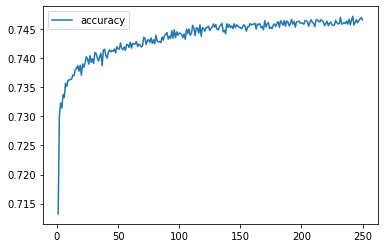

In [207]:
# Create a DataFrame containing training history
history_df6 = pd.DataFrame(fit_nn6.history)

# Increase the index by 1 to match the number of epochs
history_df6.index += 1

# Plot the loss
history_df6.plot(y="accuracy")